In [2]:
import datetime
from pathlib import Path

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data_dir = Path("./data")
data_file_path = data_dir / "electricity.csv"

In [4]:
df = pd.read_csv(data_file_path)

In [5]:
df.head()

,datetime,production_nuclear,production_thermal,production_renewable,production_heat_power,production_hydro,production_pumped_hydro,consumption_total
0,03.10.2020 20:00:00,8431,1421,157,4717,1577,949,16811
1,03.10.2020 19:00:00,8418,1414,159,4663,1499,800,16438
2,03.10.2020 18:00:00,8410,1305,319,4222,974,644,15451
3,03.10.2020 17:00:00,8421,1186,1009,3894,831,321,15006
4,03.10.2020 16:00:00,8399,1161,1471,3781,1006,0,14842


In [6]:
def parse_datetime(value):
    return datetime.datetime.strptime(value, "%d.%m.%Y %H:%M:%S")

df.datetime = df.datetime.apply(parse_datetime)

In [7]:
df.describe()

,production_nuclear,production_thermal,production_renewable,production_heat_power,production_hydro,production_pumped_hydro,consumption_total
count,59015.000000,59015.000000,59015.000000,59015.000000,59015.000000,59015.000000,59015.000000
mean,9568.566381,1056.039397,303.571245,6228.935948,836.323494,162.820266,17050.216199
std,1312.164842,554.381193,451.444776,2136.664709,630.228743,269.685633,2926.442910
min,6014.000000,349.000000,-1.000000,2064.000000,40.000000,0.000000,10905.000000
25%,8455.000000,594.000000,80.000000,4704.500000,320.000000,0.000000,15047.000000
50%,9690.000000,949.000000,178.000000,5880.000000,705.000000,0.000000,16564.000000
75%,10645.000000,1271.000000,297.000000,7357.500000,1225.000000,321.000000,19077.500000
max,12724.000000,2847.000000,3871.000000,17967.000000,3695.000000,1513.000000,30727.000000


In [8]:
production_columns = [
    'production_nuclear', 'production_thermal', 'production_renewable', 
    'production_heat_power', 'production_hydro', 'production_pumped_hydro'
]

In [17]:
def compute_the_production_sum(row):
    return row[production_columns].sum()

df["production_total"] = df[production_columns].sum(axis=1)

## Detect sufficiency of electricity

In [18]:
inner_df = df.copy()
inner_df.datetime = inner_df.datetime.apply(
    datetime.datetime.replace, day=1, hour=0, minute=0, second=0, microsecond=0)
inner_df = inner_df.groupby(
    inner_df.datetime).agg(
    {
        'production_total': sum, 
        'consumption_total': sum
    }).reset_index()

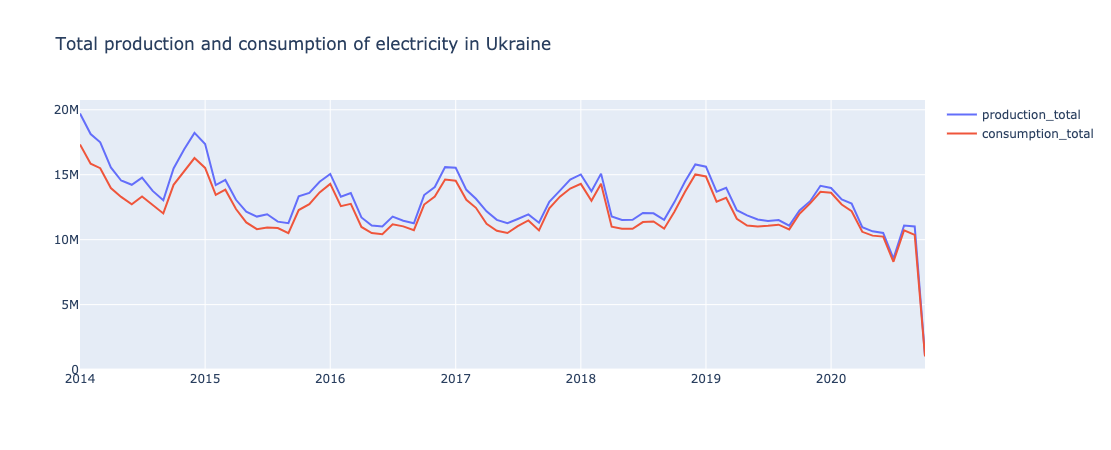

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=inner_df.datetime, y=inner_df.production_total,
                    mode='lines',
                    name='production_total'))
fig.add_trace(go.Scatter(x=inner_df.datetime, y=inner_df.consumption_total,
                    mode='lines',
                    name='consumption_total'))
fig.update_layout(
    title="Total production and consumption of electricity in Ukraine")
fig.show()

This graph shows us the dynamics of total production and consumption of electricity in Ukraine. Here we can see that each year has a pattern: Ukraine should produce more electricity from October to March because people often use different devices to make temperature conditions suitable. And less for April - September.

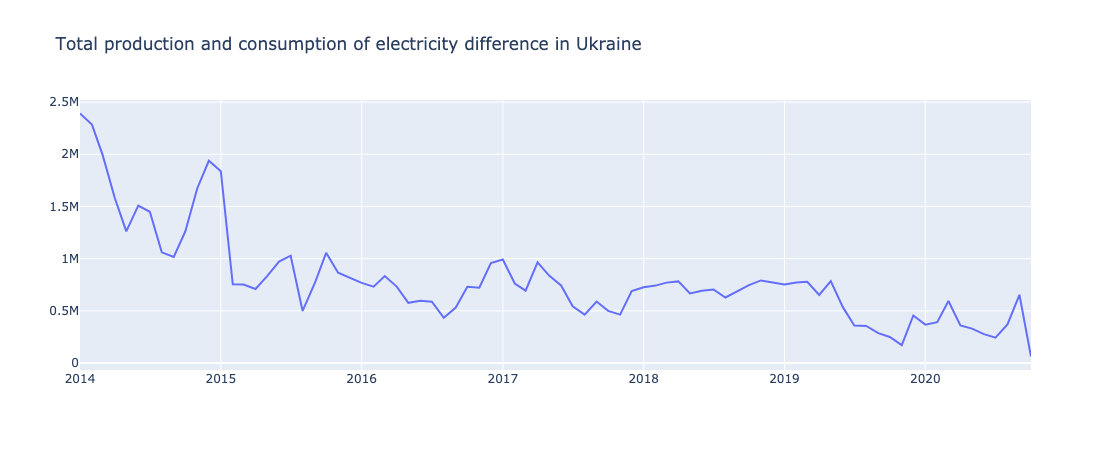

In [20]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=inner_df.datetime, y=inner_df.production_total - inner_df.consumption_total,
        mode='lines',
        name='production_total'
    )
)

fig.update_layout(
    title="Total production and consumption of electricity difference in Ukraine")
fig.show()

This a chart of total production and consumption of electricity difference in Ukraine. We can detect an interesting reduction in 2015. It was a situation when the dollar value increased rapidly, so to prevent an energy crisis, Ukraine decreased the electricity surplus.

In [23]:
inner_df = df.copy()
inner_df.datetime = inner_df.datetime.apply(
    datetime.datetime.replace, year=2020, day=1, hour=0, minute=0, second=0, microsecond=0)
inner_df = inner_df.groupby(
    inner_df.datetime).sum().reset_index()

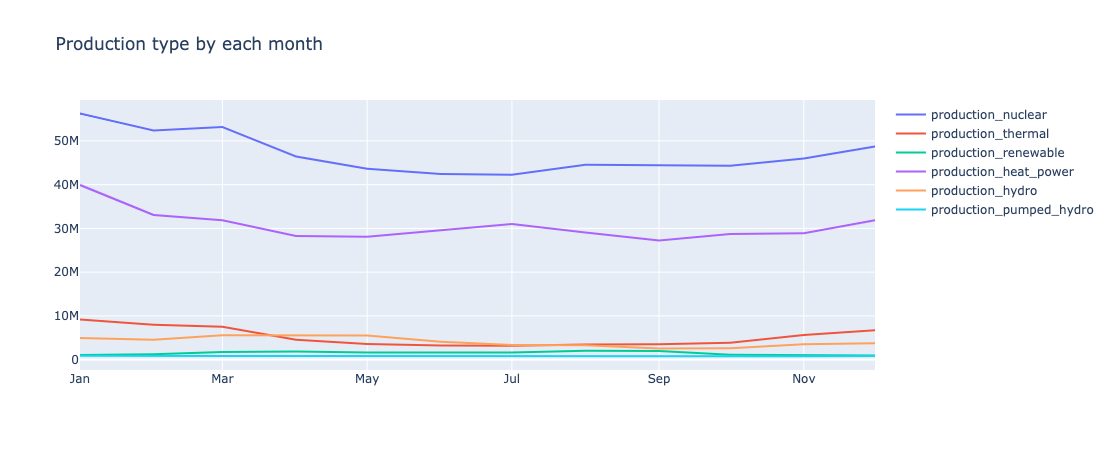

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=inner_df.datetime, y=inner_df.production_nuclear,
                    mode='lines',
                    name='production_nuclear'))
fig.add_trace(go.Scatter(x=inner_df.datetime, y=inner_df.production_thermal,
                    mode='lines',
                    name='production_thermal'))
fig.add_trace(go.Scatter(x=inner_df.datetime, y=inner_df.production_renewable,
                    mode='lines',
                    name='production_renewable'))
fig.add_trace(go.Scatter(x=inner_df.datetime, y=inner_df.production_heat_power,
                    mode='lines',
                    name='production_heat_power'))
fig.add_trace(go.Scatter(x=inner_df.datetime, y=inner_df.production_hydro,
                    mode='lines',
                    name='production_hydro'))
fig.add_trace(go.Scatter(x=inner_df.datetime, y=inner_df.production_pumped_hydro,
                    mode='lines',
                    name='production_pumped_hydro'))
fig.update_layout(
    title="Production type by each month",
    xaxis=dict(tickformat="%b")
)
fig.show()

This chart shows the level of energy production by month and type. As I told earlier we can see that April - September have a less level of energy production than others.

## Detect total percentage of energy origin

In [21]:
inner_df = df.copy()
inner_df = inner_df[production_columns].sum()

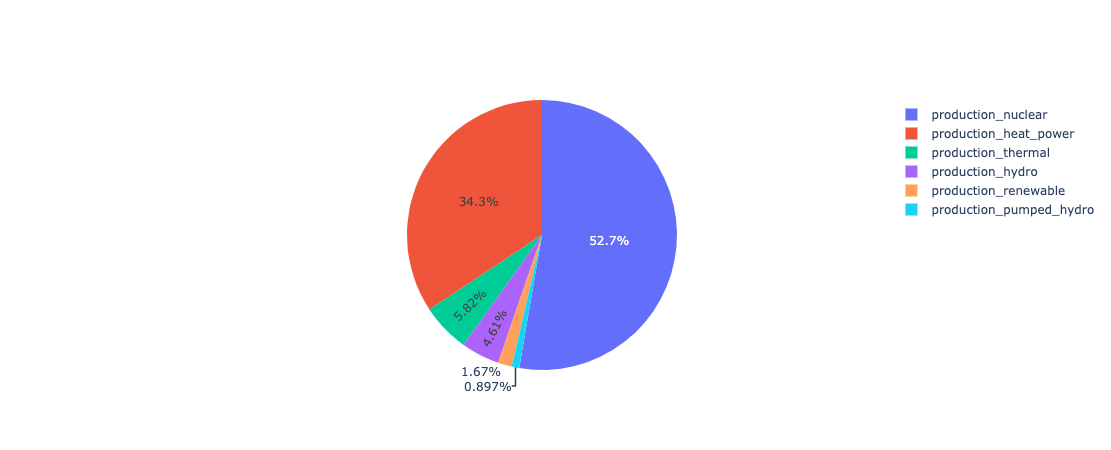

In [22]:
fig = go.Figure(data=[go.Pie(labels=inner_df.index, values=inner_df.values)])
fig.show()

Here we can see percentage of energy types according to total production. 
1. Nuclear
2. Heat power
3. Thermal
4. Hydro
5. Renewable
6. Pumped hydro

The main 2 sources of energy are nuclear and heat power energy.

## Covid-19 influence

In [35]:
inner_df = df.copy()
inner_df.datetime = inner_df.datetime.apply(
    datetime.datetime.replace, day=1, hour=0, minute=0, second=0, microsecond=0)
inner_df = inner_df.groupby(
    inner_df.datetime).agg(
    {
        'production_total': sum, 
        'consumption_total': sum
    }).reset_index()
inner_df["year"] = inner_df.datetime.apply(lambda x: x.year)
inner_df.datetime = inner_df.datetime.apply(
    datetime.datetime.replace, year=2020, day=1, hour=0, minute=0, second=0, microsecond=0)
inner_df["surplus_total"] = inner_df.production_total - inner_df.consumption_total

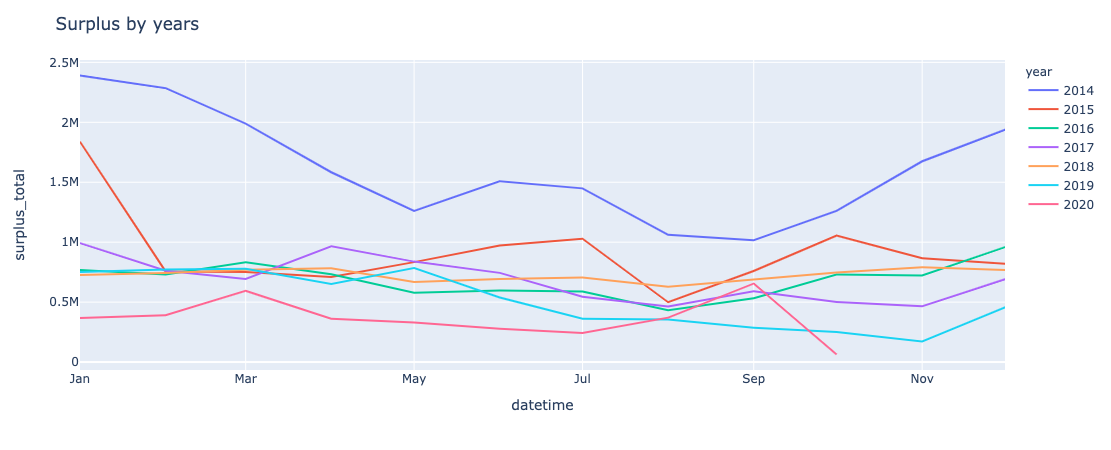

In [38]:
fig = px.line(inner_df, x="datetime", y="surplus_total", color="year",
              line_group="year")
fig.update_layout(
    title="Surplus by years",
    xaxis=dict(tickformat="%b")
)
fig.show()

As we see here, Ukraine significantly reduced the level of produced energy in 2020. One reason can be because of the quarantine - a lot of places were closed for a great period and the need for high energy levels was small. But here in 2020, we can see that in September it was created a lot of energy because the school year has begun and many educational institutions required the presence of students in the classroom. Why do we have such a surplus level in September? Because a lot of students have distance learning. At this point Ukraine was prepared for September energy level production - the cost of electricity increased in August.